In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

import world_model
import planning_cases

sns.set(style="whitegrid")
sns.set_context(context="paper")

In [5]:
result = pd.read_parquet("data/acc_reinf_25_experiment_full.parquet", engine="pyarrow")
print(result.describe())
print(result.info())
print(result.head())
#print(result["i"].unique())
result.tail()

               step         reinf     acc_reinf  cumsum_reinf
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      49.500000     -6.231743   -623.174342   -305.309700
std       28.867513      3.092394    100.667191    194.229424
min        0.000000    -16.090414   -882.917741   -882.917741
25%       24.750000     -8.670973   -692.237142   -462.988718
50%       49.500000     -6.476674   -619.668765   -291.582064
75%       74.250000     -3.723223   -580.704285   -131.184353
max       99.000000      0.000000   -327.044324      0.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
step            10000 non-null int64
reinf           10000 non-null float64
strategy        10000 non-null object
acc_reinf       10000 non-null float64
cumsum_reinf    10000 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB
None
   step     reinf strategy   acc_reinf  cumsum_reinf
0     0  0.000000    

,step,reinf,strategy,acc_reinf,cumsum_reinf
9995,95,-1.179495,random,-394.955995,-381.645023
9996,96,-1.883383,random,-394.955995,-383.528406
9997,97,-2.736142,random,-394.955995,-386.264549
9998,98,-3.741485,random,-394.955995,-390.006033
9999,99,-4.949962,random,-394.955995,-394.955995


In [7]:
df = result.copy(deep=True)
df_gb = df.groupby(by=["step", "strategy"])["acc_reinf"].aggregate([np.mean, np.var, np.std])
df_gb.tail()

mean           var         std
step strategy                                      
98   random   -590.274978  22557.090225  150.190180
99   first    -613.978112   6348.384942   79.676753
     last     -643.694290   4132.110452   64.281494
     none     -644.749989   7043.626864   83.926318
     random   -590.274978  22557.090225  150.190180

In [8]:
mean_acc_reinf_df = df_gb.loc[0]
mean_acc_reinf_df

,mean,var,std
strategy,,,
first,-613.978112,6348.384942,79.676753
last,-643.694290,4132.110452,64.281494
none,-644.749989,7043.626864,83.926318
random,-590.274978,22557.090225,150.190180


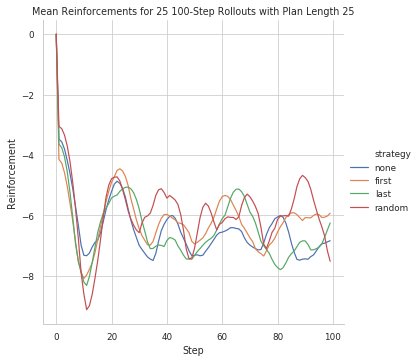

In [13]:
g = sns.relplot(
    x="step",
    y="reinf",
    hue="strategy",
    #row="strategy",
    kind="line",
    ci=None,
    data=df,
)
g.set(title="Mean Reinforcements for 25 100-Step Rollouts with Plan Length 25", ylabel="Reinforcement", xlabel="Step")


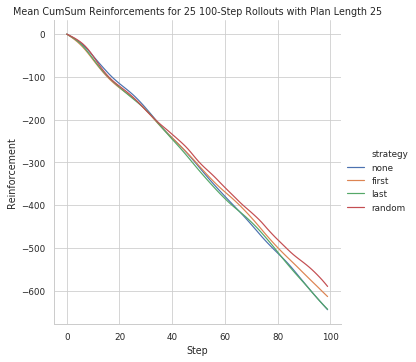

In [14]:
g1 = sns.relplot(
    x="step",
    y="cumsum_reinf",
    hue="strategy",
    #row="strategy",
    kind="line",
    ci=None,
    data=df,
)
g1.set(title="Mean CumSum Reinforcements for 25 100-Step Rollouts with Plan Length 25", ylabel="Reinforcement", xlabel="Step")


In [15]:
g.fig.savefig("graphics/acc_reinf_exp25_reinfs.svg")
g1.fig.savefig("graphics/acc_reinf_exp25_cumsum.svg")